<a href="https://colab.research.google.com/github/vinayygoudd/analytics-project/blob/main/Revenue_Driven_Customer_Churn_%26_Retention_Analysis_for_a_Subscription_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)


In [5]:
df = pd.read_csv("/customer_churn.csv")

df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']].head()


,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN


In [9]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [10]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
No,73.463013
Yes,26.536987


In [11]:
bins = [0, 6, 12, 24, 60, np.inf]
labels = ['0–6 months', '7–12 months', '1–2 years', '2–5 years', '5+ years']

df['TenureBucket'] = pd.cut(df['tenure'], bins=bins, labels=labels)


In [12]:
churn_by_tenure = (
    df.groupby('TenureBucket')['Churn']
    .value_counts(normalize=True)
    .unstack() * 100
)

churn_by_tenure


/tmp/ipython-input-1878259677.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TenureBucket')['Churn']


Churn,No,Yes
TenureBucket,,
0–6 months,46.666667,53.333333
7–12 months,64.113475,35.886525
1–2 years,71.289062,28.710938
2–5 years,81.657049,18.342951
5+ years,93.390192,6.609808


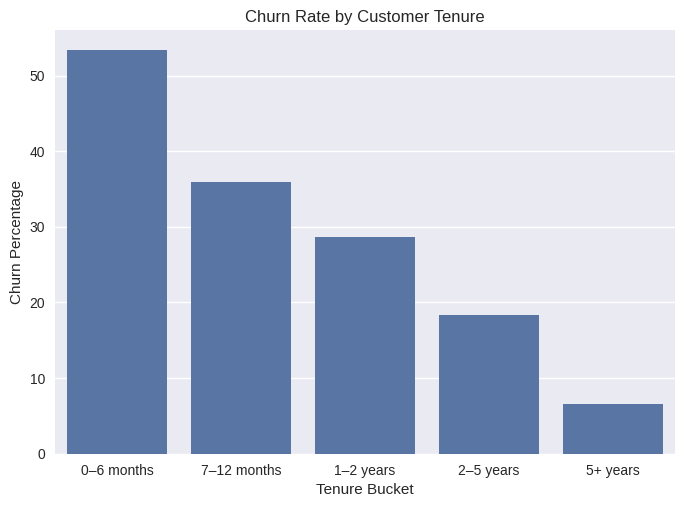

In [13]:
sns.barplot(
    x=churn_by_tenure.index,
    y=churn_by_tenure['Yes']
)
plt.title("Churn Rate by Customer Tenure")
plt.ylabel("Churn Percentage")
plt.xlabel("Tenure Bucket")
plt.show()


In [14]:
churn_by_contract = (
    df.groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .unstack() * 100
)

churn_by_contract


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


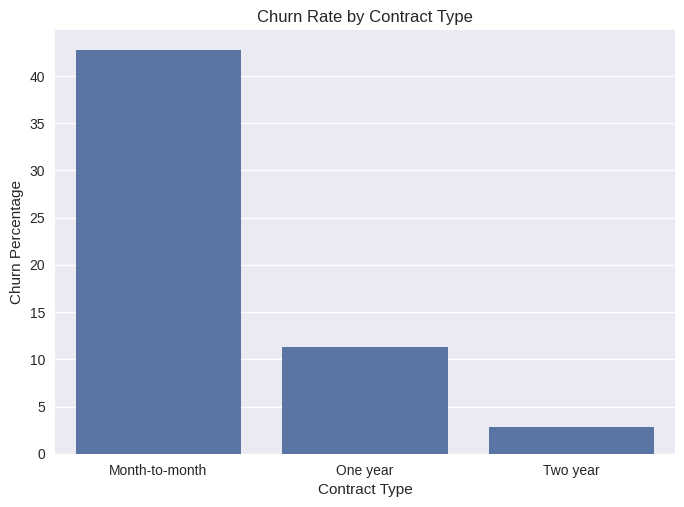

In [15]:
sns.barplot(
    x=churn_by_contract.index,
    y=churn_by_contract['Yes']
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Percentage")
plt.xlabel("Contract Type")
plt.show()


In [16]:
high_risk = df[
    (df['Contract'] == 'Month-to-month') &
    (df['TenureBucket'] == '0–6 months')
]


In [17]:
high_risk.shape[0]


1413

In [18]:
high_risk['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
Yes,55.201699
No,44.798301


In [19]:
high_risk[high_risk['Churn'] == 'Yes']['MonthlyCharges'].sum()


np.float64(49681.3)

In [20]:
churn_tech = (
    df.groupby('TechSupport')['Churn']
    .value_counts(normalize=True)
    .unstack() * 100
)
churn_tech


Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


In [21]:
churn_security = (
    df.groupby('OnlineSecurity')['Churn']
    .value_counts(normalize=True)
    .unstack() * 100
)
churn_security


Churn,No,Yes
OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


In [22]:
churn_internet = (
    df.groupby('InternetService')['Churn']
    .value_counts(normalize=True)
    .unstack() * 100
)
churn_internet


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


In [23]:
revenue_by_internet = (
    df[df['Churn'] == 'Yes']
    .groupby('InternetService')['MonthlyCharges']
    .sum()
    .sort_values(ascending=False)
)

revenue_by_internet


,MonthlyCharges
InternetService,
Fiber optic,114300.05
DSL,22529.20
No,2301.60


In [24]:
revenue_by_tech = (
    df[df['Churn'] == 'Yes']
    .groupby('TechSupport')['MonthlyCharges']
    .sum()
    .sort_values(ascending=False)
)

revenue_by_tech


,MonthlyCharges
TechSupport,
No,110709.80
Yes,26119.45
No internet service,2301.60


**Key Python Insights:**


• 53% churn occurs in first 6 months

• Month-to-month contracts have 42.7% churn

• Fiber + no tech support drives ~80% revenue loss

• High-risk segment causes ₹49K monthly loss

